In [13]:
import sys
 
sys.path.append('.')

from DataUtils import Data_Generator
from DataUtils import Data_Loader
from Models import InitialModel
from Models import ModelNewDataset

from Testing import Evaluation

from Training import train
from Testing import test


import torch
import matplotlib.pyplot as plt
import json



In [23]:
PATH_INIT_DATASET_TRAIN = "./DataUtils/datasets/train_loader.pth"
PATH_INIT_DATASET_TEST = "./DataUtils/datasets/test_loader.pth"
PATH_NEW_DATASET_TRAIN = "./Dataset/NewDataset/LZchr1-train1.pt"
PATH_NEW_DATASET_TEST = "./Dataset/NewDataset/LZchr1-test1.pt"


In [21]:
import importlib
importlib.reload(Data_Generator)
importlib.reload(Data_Loader)
importlib.reload(ModelNewDataset)
importlib.reload(InitialModel)

<module 'Models.InitialModel' from '/media/saba/d86c6f62-ad7d-43c6-99a7-2d8823c6e581/saba/Saba/UT/Gene_Prj/cre-github/cREgraph/cRE/Models/InitialModel.py'>

In [19]:
data_loader = Data_Loader.InitialData()
cre_attributes, cre_dna, cre_edge_pairs, cre_edge_matrix = data_loader.load_graph_data("./Dataset", "cre", './DataUtils/config.json')  

In [22]:
Data_Generator.generate_datasets(cre_attributes, cre_dna, cre_edge_matrix,cre_edge_pairs, config_path='./DataUtils/config.json')

portion_hidden_edges  0.1
portion_negative_to_positive  5


100%|██████████| 1000/1000 [01:12<00:00, 13.87it/s]


epoch 0, loss 309.8095397949219
epoch 0, loss 269.8965148925781
epoch 0, loss 222.7507781982422
epoch 0, loss 191.96331787109375
+----------------------+-----------------------+----------------+----------+
| Layer                | Input Shape           | Output Shape   | #Param   |
|----------------------+-----------------------+----------------+----------|
| gnn_network          | [1600, 1600]          | [160000, 2]    | 641,005  |
| ├─(conv1)GCNConv     | [1600, 500], [2, 542] | [1600, 300]    | 150,300  |
| ├─(conv2)GCNConv     | [1600, 300], [2, 542] | [1600, 200]    | 60,200   |
| ├─(linear)Linear     | [100, 100, 1]         | [100, 100, 2]  | 4        |
| ├─(bilinear)Bilinear | --                    | --             | 40,001   |
| ├─(transform1)Linear | [1600, 11]            | [1600, 500]    | 6,000    |
| ├─(transform2)Linear | [1600, 768]           | [1600, 500]    | 384,500  |
+----------------------+-----------------------+----------------+----------+
epoch 1, loss 162.841827

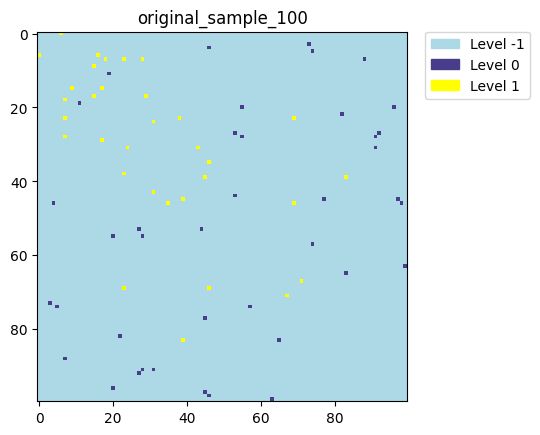

Plot section...


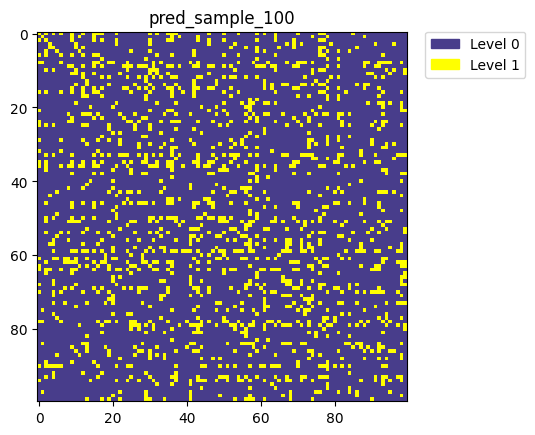

tensor(158867)
Plot section...


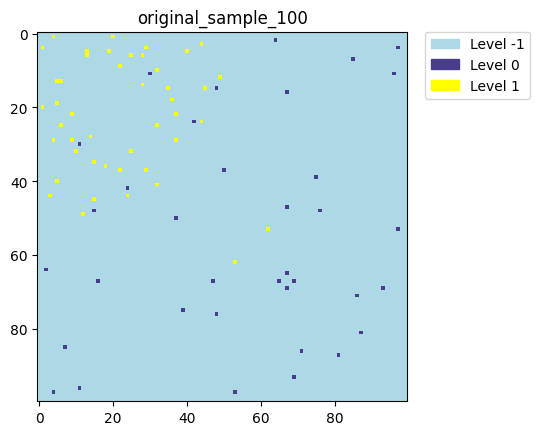

Plot section...


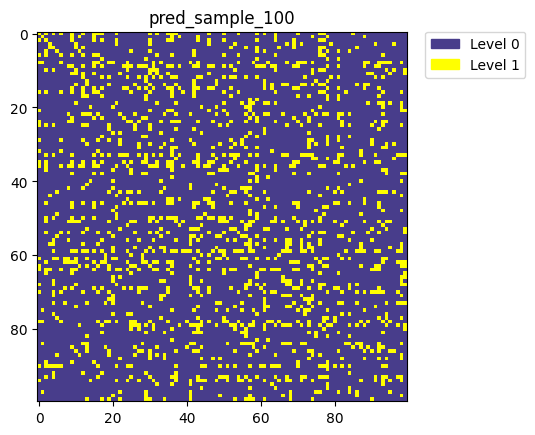

tensor(158970)
tensor(158807)
tensor(158996)
tensor(158746)
tensor(158923)
tensor(158755)
tensor(158814)
tensor(158910)
tensor(158978)
tensor(158891)
tensor(79449)
f1 score is:  0.7467834660618158


In [27]:
dataset_train_list = torch.load(PATH_INIT_DATASET_TRAIN)
dataset_test_list = torch.load(PATH_INIT_DATASET_TEST)

config_file = open( "./Models/config.json")
config_json = json.load(config_file)
feature = torch.tensor(config_json["feature_inp"])
model = InitialModel.gnn_network(feature.size(0), config_json["gcn_input_size"], config_json["gcn_hidden_size"], config_json["gcn_output_size"],
                        config_json["batch_size"], config_json["sample_size"])

model, losses_train, losses_test = train.train_gnn_model(model,dataset_train_list, dataset_train_list, "./Models/config.json")
y_true, y_pred = test.test_model(model, dataset_test_list, "./Models/config.json")


In [17]:
Evaluation.evaluate_result(y_true, y_pred)

True positive is:  28
False negative is:  1839774
New positive is:  0
New negative is:  0
False positive is:  0
True negative is:  160198
Precision(+) is:  1.0
Precision(-) is:  0.08010012140169963
Recall(+) is:  1.5219029004208062e-05
Recall(-) is:  1.0


In [12]:
def plot_losses(losses_train, losses_test):
  plt.plot(range(1, len(losses_train) + 1), losses_train, '-o')
  plt.plot(range(1, len(losses_test) + 1), losses_test, '-o', color='g')
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.show()

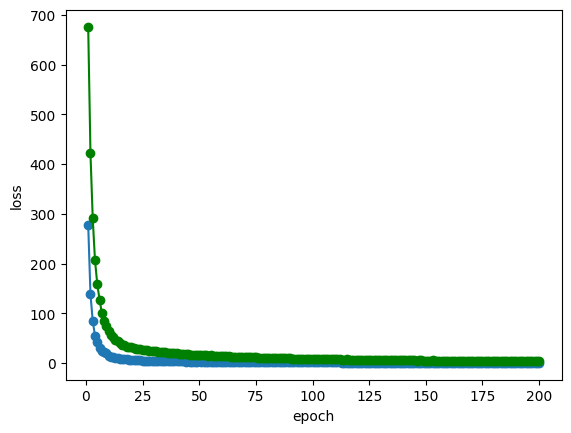

In [13]:
plot_losses(losses_train, losses_test)